In [2]:
import pandas as pd

# Load the dataset
file_path = 'combined_sentiment_data.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = {
    "head": data.head(),
    "info": data.info(),
    "missing_values": data.isnull().sum()
}
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   3309 non-null   object
 1   sentiment  3309 non-null   object
dtypes: object(2)
memory usage: 51.8+ KB


{'head':                                             sentence sentiment
 0  So there is no way for me to plug it in here i...  negative
 1                        Good case, Excellent value.  positive
 2                             Great for the jawbone.  positive
 3  Tied to charger for conversations lasting more...  negative
 4                                  The mic is great.  positive,
 'info': None,
 'missing_values': sentence     0
 sentiment    0
 dtype: int64}

In [4]:
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Text cleaning function
def clean_text(text):
    # Lowercase text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

# Apply text cleaning
data['cleaned_sentence'] = data['sentence'].apply(clean_text)

# Encode the target labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])

# Display sample of cleaned data
data[['cleaned_sentence', 'sentiment', 'sentiment_encoded']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nijaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cleaned_sentence,sentiment,sentiment_encoded
0,way plug us unless go converter,negative,0
1,good case excellent value,positive,1
2,great jawbone,positive,1
3,tied charger conversations lasting 45 minutesm...,negative,0
4,mic great,positive,1


C:\Users\nijaa\AppData\Local\Temp\ipykernel_6540\2224637077.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, order=data['sentiment'].value_counts().index, palette="viridis")


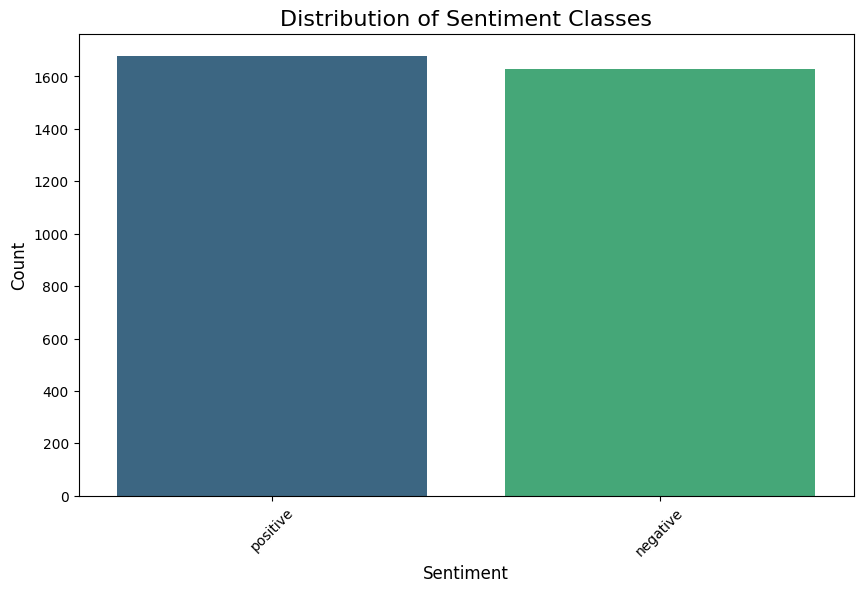

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of emotion classes
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=data, order=data['sentiment'].value_counts().index, palette="viridis")
plt.title('Distribution of Sentiment Classes', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X = vectorizer.fit_transform(data['cleaned_sentence'])  # Feature matrix
y = data['sentiment_encoded']  # Target labels

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Model Training (Logistic Regression)
model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
accuracy = accuracy_score(y_test, y_pred)

# Display evaluation metrics
evaluation_results = {
    "accuracy": accuracy,
    "classification_report": report
}
evaluation_results

{'accuracy': 0.8036253776435045,
 'classification_report': '              precision    recall  f1-score   support\n\n    negative       0.82      0.77      0.79       326\n    positive       0.79      0.83      0.81       336\n\n    accuracy                           0.80       662\n   macro avg       0.80      0.80      0.80       662\nweighted avg       0.80      0.80      0.80       662\n'}

In [8]:
print(evaluation_results['classification_report'])

              precision    recall  f1-score   support

    negative       0.82      0.77      0.79       326
    positive       0.79      0.83      0.81       336

    accuracy                           0.80       662
   macro avg       0.80      0.80      0.80       662
weighted avg       0.80      0.80      0.80       662

